In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [332]:
base = pd.read_csv('base_segundo_encontro.csv', encoding='latin-1', sep=';')
base

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,Restaurante,Estressado,Sim
1,102,13,2,10,41,6,Bar,Estável,Sim
2,24,8,2,3,16,9,Café,Estável,Sim
3,116,7,4,0,8,4,Bar,Estressado,Sim
4,81,1,2,5,5,7,Parque,Estável,Não
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,Bar,Estável,Sim
996,68,17,5,6,12,3,Restaurante,Estável,Sim
997,137,5,3,7,7,7,Parque,Cansado,Sim
998,123,10,1,10,27,8,Bar,Estressado,Não


In [333]:
base.isnull().sum()

tempo_conversa_min     0
risadas                0
pontos_comuns          0
nivel_timidez          0
mensagens_antes        0
iniciativa_conversa    0
local_encontro         0
momento_da_vida        0
segundo_encontro       0
dtype: int64

<Axes: xlabel='segundo_encontro', ylabel='count'>

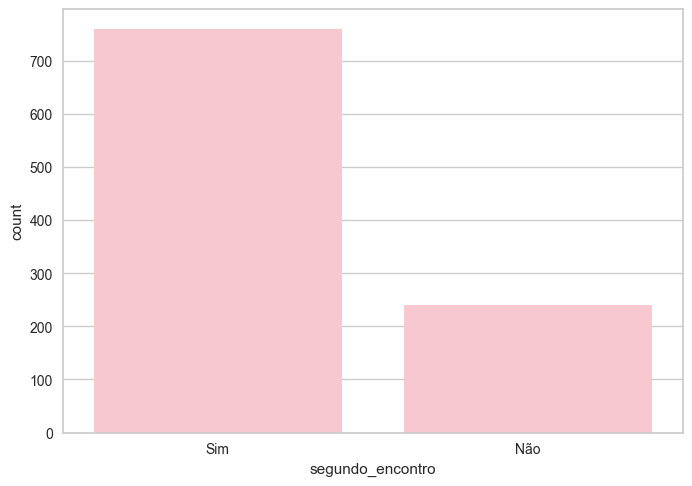

In [334]:
sns.countplot(x= base['segundo_encontro'], color='pink')

<Axes: xlabel='local_encontro', ylabel='count'>

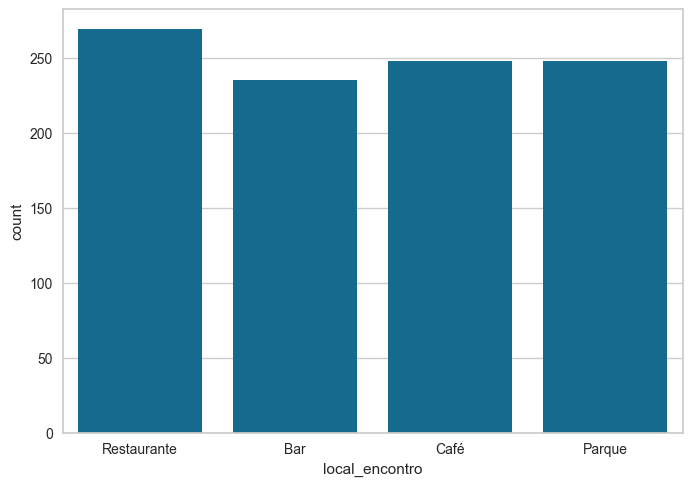

In [335]:
sns.countplot(x= base['local_encontro'])

<Axes: xlabel='momento_da_vida', ylabel='count'>

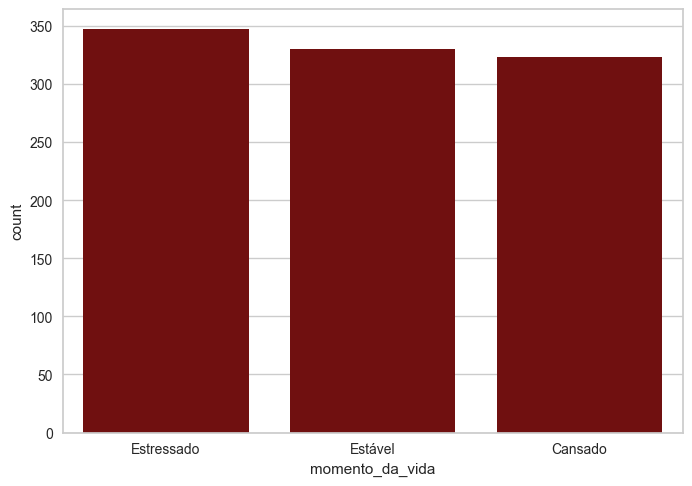

In [336]:
sns.countplot(x= base['momento_da_vida'], color='maroon')

In [337]:
x = base.iloc[:, 0:8].values
y = base.iloc[:, 8].values

In [338]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_features = ColumnTransformer(
    transformers=[('OneHot', OneHotEncoder(), [6,7])], 
    remainder='passthrough')


In [339]:
x = onehotencoder_features.fit_transform(x)

In [340]:
x.shape, y.shape

((1000, 13), (1000,))

In [341]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [342]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((800, 13), (200, 13))

In [343]:
y_train.shape, y_test.shape

((800,), (200,))

In [344]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [345]:
previsoes = svm.predict(x_test)
previsoes

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

In [346]:
y_test

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

In [347]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, previsoes)

0.995

0.995

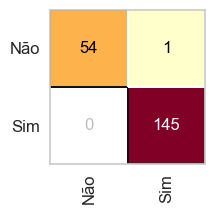

In [348]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [349]:
kernels=['linear', 'rbf', 'sigmoid', 'poly']
Cs = [0.1, 1, 2, 10]
best_score = 0
best_kernel = None
best_C = 0

for i in kernels:
    for j in Cs:
        svm = SVC(kernel= i , C= j)
        svm.fit(x_train, y_train)
        previsoes = svm.predict(x_test)
        score = accuracy_score(y_test, previsoes)
        
        if score > best_score:
            best_score = score
            best_kernel = i
            best_C = j

print(f"\nBest score: {best_score}")
print(f"\nBest kernel: {best_kernel}")
print(f"\nBest C: {best_C}")


Best score: 0.995

Best kernel: linear

Best C: 1


In [350]:
def inputs():
    date = list(base.columns)
    for i in date:
        int(input(f"{i}: "))

In [351]:
inputs()

ValueError: invalid literal for int() with base 10: ''